In [2]:
import sklearn
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import math
import operator
import numpy as np
from sklearn.metrics import confusion_matrix
from metric_learn import LFDA
from metric_learn import LMNN
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
from math import sqrt

In [3]:
data = load_wine()
X = data.data
print(X.shape)

    
y = data.target
print(type(data))

(178, 13)
<class 'sklearn.utils.Bunch'>


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 13)
(36, 13)
(142,)
(36,)


=======k=1:=======
[2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0]
acc = 0.7777777777777778
K = 1


<AxesSubplot:>

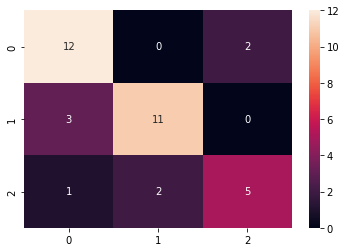

In [8]:
import numpy as np
from collections import Counter
from numpy.linalg import norm

def euclidean_distance(a, b):
    return norm(a-b)

class KNN:
    def __init__(self, k=3):
        self.k = k

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predictforAllData(self, X):
        knn_ = []
        predictions = []
        for x in X:
            predictions.append(self.predictforOne(x)[0])
            knn_.append(self.predictforOne(x)[1])
        return predictions, knn_

    def predictforOne(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
#         print(k_nearest_labels)
        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0],k_nearest_labels
    
    
clf = KNN(k=1)
clf.train(X_train, y_train)
predictions_k1,k_nearest_labels1= clf.predictforAllData(X_test)
print('=======k=1:=======')
print(predictions_k1)
acc = np.sum(predictions_k1 == y_test) / len(y_test)
print('acc = ' + str(acc))
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_test, predictions_k1)
from sklearn.metrics import accuracy_score 
print ("K = 1")
import seaborn as sns
sns.heatmap(cm_1, annot=True)

=======k=5:=======
[2, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0]
acc = 0.75
K = 5


<AxesSubplot:>

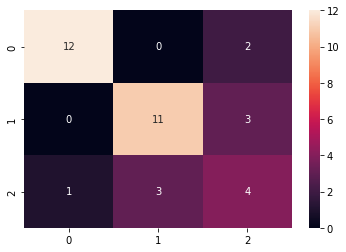

In [9]:
clf = KNN(k=5)
clf.train(X_train, y_train)
predictions_k5,k_nearest_labels5 = clf.predictforAllData(X_test)
print('=======k=5:=======')
print(predictions_k5)
acc = np.sum(predictions_k5 == y_test) / len(y_test)
print('acc = ' + str(acc))
cm_5 = confusion_matrix(y_test, predictions_k5)
print ("K = 5")
sns.heatmap(cm_5, annot=True)

=======k=10:=======
[2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0]
acc = 0.6944444444444444
K = 10


<AxesSubplot:>

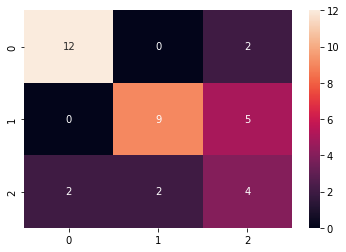

In [10]:
clf = KNN(k=10)
clf.train(X_train, y_train)
predictions_k10,k_nearest_labels10 = clf.predictforAllData(X_test)
print('=======k=10:=======')
print(predictions_k10)

acc = np.sum(predictions_k10 == y_test) / len(y_test)
print('acc = ' + str(acc))
cm_10 = confusion_matrix(y_test, predictions_k10)
print ("K = 10")
sns.heatmap(cm_10, annot=True)

=======k=20:=======
[0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0]
acc = 0.7777777777777778
K = 20


<AxesSubplot:>

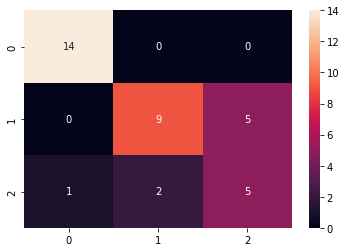

In [11]:
clf = KNN(k=20)
clf.train(X_train, y_train)
predictions_k20,k_nearest_labels20 = clf.predictforAllData(X_test)
print('=======k=20:=======')
print(predictions_k20)

acc = np.sum(predictions_k20 == y_test) / len(y_test)
print('acc = ' + str(acc))
cm_20 = confusion_matrix(y_test, predictions_k20)
print ("K = 20")
sns.heatmap(cm_20, annot=True)

In [17]:
true1 = []
false1 = []
for x in range(len(k_nearest_labels1)):
    mf = most_frequent(k_nearest_labels1[x])
    temp = k_nearest_labels1[x]
    count = 0
    for i in range(len(temp)):
        if (temp[i]== mf):
            count+=1
    prob = count
    if(mf==y_test[x]):
        true1.append(prob)
    else:
        false1.append(prob)
true_final1 = np.zeros(2)
counts1 = Counter(true1)

true_final1[0] = counts1[0]
true_final1[1] = counts1[1]
false_final1 = np.zeros(2)
counts2 = Counter(false1)
false_final1[0] = counts2[0]
false_final1[1] = counts2[1]
counts2


Counter({1: 8})

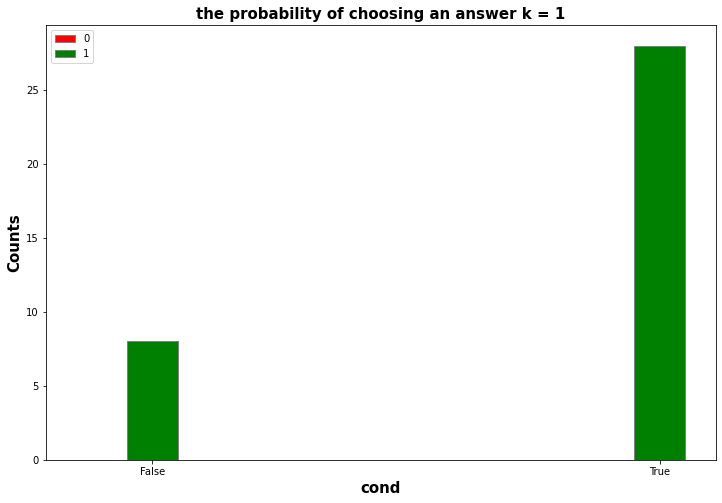

In [18]:
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))

# set height of bar
IT1 = [false_final1[0],true_final1[0]]
IT2 = [false_final1[1],true_final1[1]]



# Set position of bar on X axis
br1 = np.arange(len(IT1))
br2 = [x + barWidth for x in br1]


# Make the plot
plt.bar(br1, IT1, color ='r', width = barWidth,edgecolor ='grey', label ='0')
plt.bar(br2, IT2, color ='g', width = barWidth,edgecolor ='grey', label ='1')

plt.title('the probability of choosing an answer k = 1',fontweight ='bold', fontsize = 15)
plt.xlabel('cond', fontweight ='bold', fontsize = 15)
plt.ylabel('Counts', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT1))],['False', 'True'])

plt.legend()
plt.show()

In [64]:
true5 = []
false5 = []
for x in range(len(k_nearest_labels5)):
    mf = most_frequent(k_nearest_labels5[x])
    temp = k_nearest_labels5[x]
    count = 0
    for i in range(len(temp)):
        if (temp[i]== mf):
            count+=1
    prob = count/5
    if(mf==y_test[x]):
        true5.append(prob)
    else:
        false5.append(prob)
true_final5 = np.zeros(7)
counts1 = Counter(true5)

true_final5[0] = counts1[0.4]
true_final5[1] = counts1[0.5]
true_final5[2] = counts1[0.6]
true_final5[3] = counts1[0.7]
true_final5[4] = counts1[0.8]
true_final5[5] = counts1[0.9]
true_final5[6] = counts1[1]
false_final5 = np.zeros(7)
counts2 = Counter(false5)
false_final5[0] = counts2[0.4]
false_final5[1] = counts2[0.5]
false_final5[2] = counts2[0.6]
false_final5[3] = counts2[0.7]
false_final5[4] = counts2[0.8]
false_final5[5] = counts2[0.9]
false_final5[6] = counts2[1]
counts2


Counter({0.6: 6, 0.8: 3})

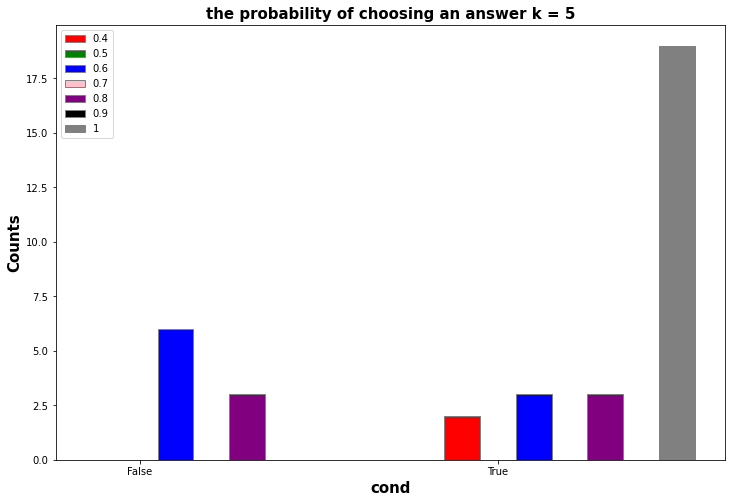

In [62]:
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))

# set height of bar
IT1 = [false_final5[0],true_final5[0]]
IT2 = [false_final5[1],true_final5[1]]
IT3 = [false_final5[2],true_final5[2]]
IT4 = [false_final5[3],true_final5[3]]
IT5 = [false_final5[4],true_final5[4]]
IT6 = [false_final5[5],true_final5[5]]
IT7 = [false_final5[6],true_final5[6]]


# Set position of bar on X axis
br1 = np.arange(len(IT1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]

# Make the plot
plt.bar(br1, IT1, color ='r', width = barWidth,edgecolor ='grey', label ='0.4')
plt.bar(br2, IT2, color ='g', width = barWidth,edgecolor ='grey', label ='0.5')
plt.bar(br3, IT3, color ='b', width = barWidth,edgecolor ='grey', label ='0.6')
plt.bar(br4, IT4, color ='pink', width = barWidth,edgecolor ='grey', label ='0.7')
plt.bar(br5, IT5, color ='purple', width = barWidth,edgecolor ='grey', label ='0.8')
plt.bar(br6, IT6, color ='black', width = barWidth,edgecolor ='grey', label ='0.9')
plt.bar(br7, IT7, color ='grey', width = barWidth,edgecolor ='grey', label ='1')

plt.title('the probability of choosing an answer k = 5',fontweight ='bold', fontsize = 15)
plt.xlabel('cond', fontweight ='bold', fontsize = 15)
plt.ylabel('Counts', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT1))],['False', 'True'])

plt.legend()
plt.show()

In [13]:
def most_frequent(List):
    counter = 0
    num = List[0]
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
    return num
true10 = []
false10 = []
for x in range(len(k_nearest_labels10)):
    mf = most_frequent(k_nearest_labels10[x])
    temp = k_nearest_labels10[x]
    count = 0
    for i in range(len(temp)):
        if (temp[i]== mf):
            count+=1
    prob = count/10
    if(mf==y_test[x]):
        true10.append(prob)
    else:
        false10.append(prob)
true_final10 = np.zeros(7)
counts1 = Counter(true10)

true_final10[0] = counts1[0.4]
true_final10[1] = counts1[0.5]
true_final10[2] = counts1[0.6]
true_final10[3] = counts1[0.7]
true_final10[4] = counts1[0.8]
true_final10[5] = counts1[0.9]
true_final10[6] = counts1[1]
false_final10 = np.zeros(7)
counts2 = Counter(false10)
false_final10[0] = counts2[0.4]
false_final10[1] = counts2[0.5]
false_final10[2] = counts2[0.6]
false_final10[3] = counts2[0.7]
false_final10[4] = counts2[0.8]
false_final10[5] = counts2[0.9]
false_final10[6] = counts2[1]


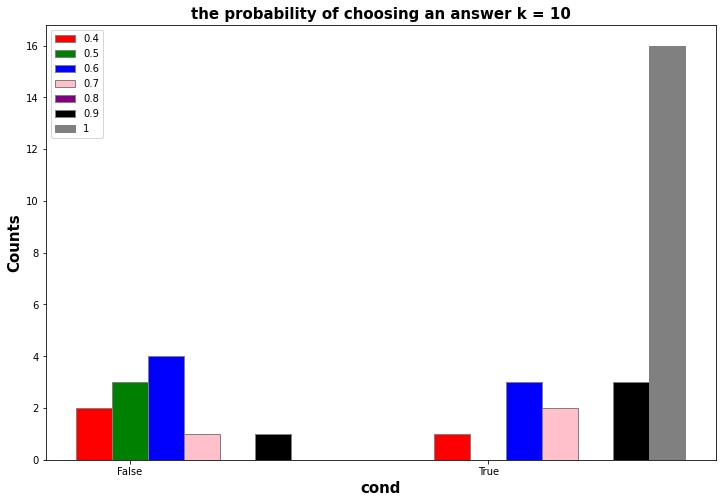

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))

# set height of bar
IT1 = [false_final10[0],true_final10[0]]
IT2 = [false_final10[1],true_final10[1]]
IT3 = [false_final10[2],true_final10[2]]
IT4 = [false_final10[3],true_final10[3]]
IT5 = [false_final10[4],true_final10[4]]
IT6 = [false_final10[5],true_final10[5]]
IT7 = [false_final10[6],true_final10[6]]


# Set position of bar on X axis
br1 = np.arange(len(IT1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]

# Make the plot
plt.bar(br1, IT1, color ='r', width = barWidth,edgecolor ='grey', label ='0.4')
plt.bar(br2, IT2, color ='g', width = barWidth,edgecolor ='grey', label ='0.5')
plt.bar(br3, IT3, color ='b', width = barWidth,edgecolor ='grey', label ='0.6')
plt.bar(br4, IT4, color ='pink', width = barWidth,edgecolor ='grey', label ='0.7')
plt.bar(br5, IT5, color ='purple', width = barWidth,edgecolor ='grey', label ='0.8')
plt.bar(br6, IT6, color ='black', width = barWidth,edgecolor ='grey', label ='0.9')
plt.bar(br7, IT7, color ='grey', width = barWidth,edgecolor ='grey', label ='1')

plt.title('the probability of choosing an answer k = 10',fontweight ='bold', fontsize = 15)
plt.xlabel('cond', fontweight ='bold', fontsize = 15)
plt.ylabel('Counts', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT1))],['False', 'True'])

plt.legend()
plt.show()


In [44]:
true20 = []
false20 = []
for x in range(len(k_nearest_labels20)):
    mf = most_frequent(k_nearest_labels20[x])
    temp = k_nearest_labels20[x]
    count = 0
    for i in range(len(temp)):
        if (temp[i]== mf):
            count+=1
    prob = count/20
    if(mf==y_test[x]):
        true20.append(prob)
    else:
        false20.append(prob)
true_final20 = np.zeros(13)
counts1 = Counter(true20)

true_final20[0] = counts1[0.4]
true_final20[1] = counts1[0.45]
true_final20[2] = counts1[0.5]
true_final20[3] = counts1[0.55]
true_final20[4] = counts1[0.6]
true_final20[5] = counts1[0.65]
true_final20[6] = counts1[0.7]
true_final20[7] = counts1[0.75]
true_final20[8] = counts1[0.8]
true_final20[9] = counts1[0.85]
true_final20[10] = counts1[0.9]
true_final20[11] = counts1[0.95]
true_final20[12] = counts1[1]


false_final20 = np.zeros(13)
counts2 = Counter(false20)
false_final20[0] = counts2[0.4]
false_final20[1] = counts2[0.45]
false_final20[2] = counts2[0.5]
false_final20[3] = counts2[0.55]
false_final20[4] = counts2[0.6]
false_final20[5] = counts2[0.65]
false_final20[6] = counts2[0.7]
false_final20[7] = counts2[0.75]
false_final20[8] = counts2[0.8]
false_final20[9] = counts2[0.85]
false_final20[10] = counts2[0.9]
false_final20[11] = counts2[0.95]
false_final20[12] = counts2[1]
false_final20


array([0., 0., 1., 0., 3., 3., 0., 0., 0., 1., 0., 0., 0.])

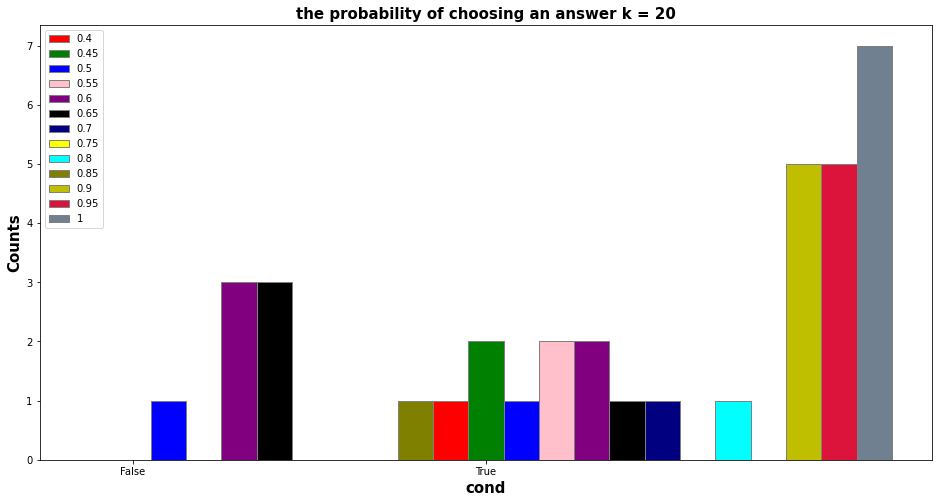

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(16, 8))

# set height of bar
IT1 = [false_final20[0],true_final20[0]]
IT2 = [false_final20[1],true_final20[1]]
IT3 = [false_final20[2],true_final20[2]]
IT4 = [false_final20[3],true_final20[3]]
IT5 = [false_final20[4],true_final20[4]]
IT6 = [false_final20[5],true_final20[5]]
IT7 = [false_final20[6],true_final20[6]]
IT8 = [false_final20[7],true_final20[7]]
IT9 = [false_final20[8],true_final20[8]]
IT10 = [false_final20[9],true_final20[9]]
IT11 = [false_final20[10],true_final20[10]]
IT12 = [false_final20[11],true_final20[11]]
IT13 = [false_final20[12],true_final20[12]]

# Set position of bar on X axis
br1 = np.arange(len(IT1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]
br10 = [x + barWidth for x in br9]
br11 = [x + barWidth for x in br10]
br12 = [x + barWidth for x in br11]
br13 = [x + barWidth for x in br12]

# Make the plot
plt.bar(br1, IT1, color ='r', width = barWidth,edgecolor ='grey', label ='0.4')
plt.bar(br2, IT2, color ='g', width = barWidth,edgecolor ='grey', label ='0.45')
plt.bar(br3, IT3, color ='b', width = barWidth,edgecolor ='grey', label ='0.5')
plt.bar(br4, IT4, color ='pink', width = barWidth,edgecolor ='grey', label ='0.55')
plt.bar(br5, IT5, color ='purple', width = barWidth,edgecolor ='grey', label ='0.6')
plt.bar(br6, IT6, color ='black', width = barWidth,edgecolor ='grey', label ='0.65')
plt.bar(br7, IT7, color ='navy', width = barWidth,edgecolor ='grey', label ='0.7')
plt.bar(br8, IT8, color ='yellow', width = barWidth,edgecolor ='grey', label ='0.75')
plt.bar(br9, IT9, color ='cyan', width = barWidth,edgecolor ='grey', label ='0.8')

plt.bar(br10, IT10, color ='olive', width = barWidth,edgecolor ='grey', label ='0.85')

plt.bar(br11, IT11, color ='y', width = barWidth,edgecolor ='grey', label ='0.9')
plt.bar(br12, IT12, color ='crimson', width = barWidth,edgecolor ='grey', label ='0.95')
plt.bar(br13, IT13, color ='slategray', width = barWidth,edgecolor ='grey', label ='1')

plt.title('the probability of choosing an answer k = 20',fontweight ='bold', fontsize = 15)
plt.xlabel('cond', fontweight ='bold', fontsize = 15)
plt.ylabel('Counts', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT1))],['False', 'True'])

plt.legend()
plt.show()

# Dimension reduction

### LFDA

In [20]:
def plot_tsne(X, y, colormap=plt.cm.Paired):
    plt.figure(figsize=(8, 6))

    # clean the figure
    plt.clf()

    tsne = TSNE()
    X_embedded = tsne.fit_transform(X)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=colormap)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('first dimension')
    plt.ylabel('second dimension')
    
    plt.show()

C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


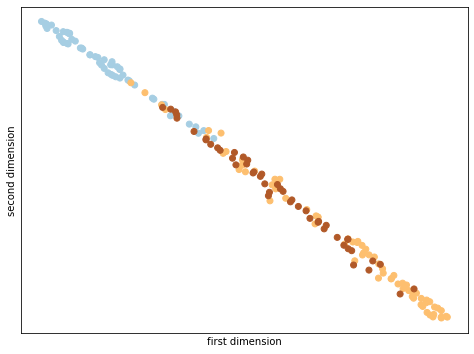

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

pca.fit(X, y)
X_0 = pca.transform(X)
plot_tsne(X_0, y)

### K = 1

C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


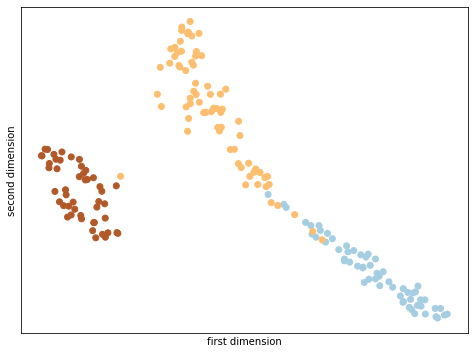

In [24]:
lfda1 = LFDA(k = 1, n_components = 2)

lfda1.fit(X, y)
X_lfda1 = lfda1.transform(X)
plot_tsne(X_lfda1, y)

### K = 5

C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


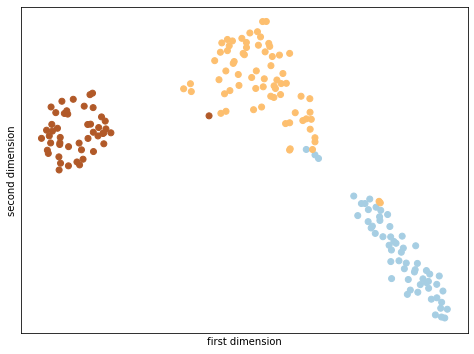

In [25]:
lfda5 = LFDA(k = 5, n_components = 2)

lfda5.fit(X, y)
X_lfda5 = lfda5.transform(X)
plot_tsne(X_lfda5, y)

### K = 15

C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\metric_learn\lfda.py:109: UserWarning: Chosen k (15) too large, using 12 instead.
  warnings.warn('Chosen k (%d) too large, using %d instead.'
C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


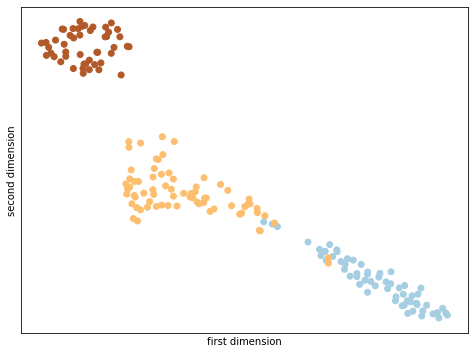

In [26]:
lfda15 = LFDA(k = 15, n_components = 2)

lfda15.fit(X, y)
X_lfda15 = lfda15.transform(X)
plot_tsne(X_lfda15, y)

In [30]:
lfda15main = LFDA(k = 15, n_components = 13)

lfda15main.fit(X, y)
X_lfda15main = lfda15main.transform(X)
X_lfda_train15 = lfda15main.transform(X_train)
X_lfda_test15 = lfda15main.transform(X_test)

C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\metric_learn\lfda.py:109: UserWarning: Chosen k (15) too large, using 12 instead.
  warnings.warn('Chosen k (%d) too large, using %d instead.'
C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


## c) Comparing functionality of different Classifiers

In [37]:
clf = KNN(k=1)
clf.train(X_lfda_train15, y_train)
predictions_k1 = clf.predictforAllData(X_lfda_test15)
print('=======k=1:=======')
print(predictions_k1[0])
acc = np.sum(predictions_k1 == y_test) / len(y_test)
print(acc)

clf = KNN(k=5)
clf.train(X_lfda_train15, y_train)
predictions_k5 = clf.predictforAllData(X_lfda_test15)
print('=======k=5:=======')
print(predictions_k5[0])

acc = np.sum(predictions_k5 == y_test) / len(y_test)
print(acc)

clf = KNN(k=10)
clf.train(X_lfda_train15, y_train)
predictions_k10 = clf.predictforAllData(X_lfda_test15)
print('=======k=10:=======')
print(predictions_k10[0])

acc = np.sum(predictions_k10 == y_test) / len(y_test)
print(acc)

clf = KNN(k=20)
clf.train(X_lfda_train15, y_train)
predictions_k20 = clf.predictforAllData(X_lfda_test15)
print('=======k=20:=======')
print(predictions_k20[0])

acc = np.sum(predictions_k20 == y_test) / len(y_test)
print(acc)

=======k=1:=======
[0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0]
1.0
=======k=5:=======
[0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0]
1.0


C:\Users\Niloufar Faridani\AppData\Local\Temp\ipykernel_7980\1159263132.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  acc = np.sum(predictions_k1 == y_test) / len(y_test)
C:\Users\Niloufar Faridani\AppData\Local\Temp\ipykernel_7980\1159263132.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  acc = np.sum(predictions_k5 == y_test) / len(y_test)


=======k=10:=======
[0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0]
1.0
=======k=20:=======
[0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0]
1.0


C:\Users\Niloufar Faridani\AppData\Local\Temp\ipykernel_7980\1159263132.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  acc = np.sum(predictions_k10 == y_test) / len(y_test)
C:\Users\Niloufar Faridani\AppData\Local\Temp\ipykernel_7980\1159263132.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  acc = np.sum(predictions_k20 == y_test) / len(y_test)


K = 1


<AxesSubplot:>

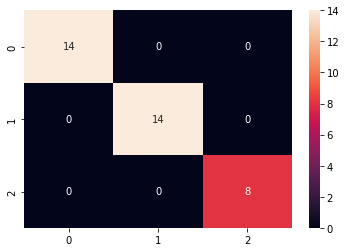

In [96]:
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_test, predictions_k1)
from sklearn.metrics import accuracy_score 
print ("K = 1")
import seaborn as sns
sns.heatmap(cm_1, annot=True)

K = 5


<AxesSubplot:>

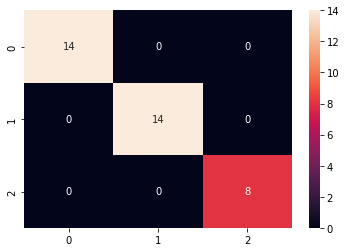

In [97]:
cm_5 = confusion_matrix(y_test, predictions_k5)
print ("K = 5")
sns.heatmap(cm_5, annot=True)

K = 10


<AxesSubplot:>

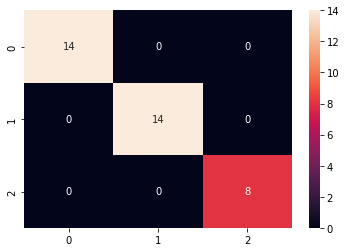

In [100]:
cm_10 = confusion_matrix(y_test, predictions_k10)
print ("K = 10")
sns.heatmap(cm_10, annot=True)

K = 20


<AxesSubplot:>

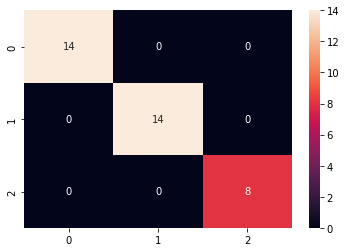

In [101]:
cm_20 = confusion_matrix(y_test, predictions_k20)
print ("K = 20")
sns.heatmap(cm_20, annot=True)

### LMNN

### K=1

C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


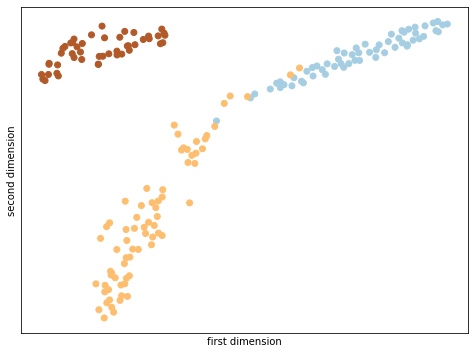

In [32]:
lmnn1 = LMNN(k=1, learn_rate=1e-6,n_components = 2)

lmnn1.fit(X, y)
X1 = lmnn1.transform(X)
plot_tsne(X1, y)

C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


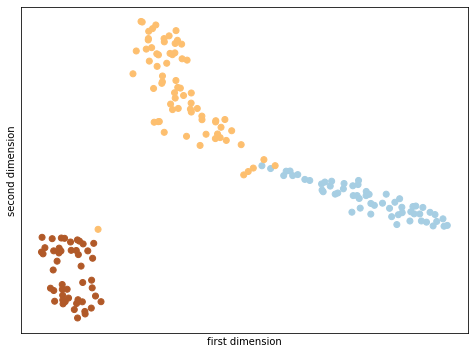

In [33]:
lmnn5 = LMNN(k=5, learn_rate=1e-6,n_components = 2)

lmnn5.fit(X, y)
X5 = lmnn5.transform(X)
plot_tsne(X5, y)

### K = 15

C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


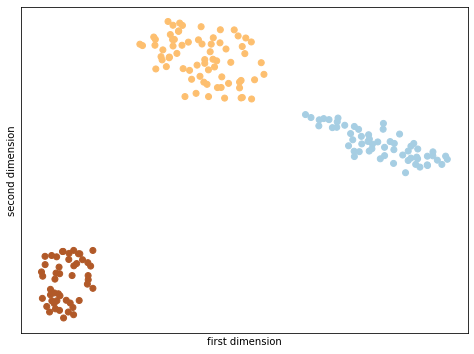

In [35]:
lmnn15 = LMNN(k=15, learn_rate=1e-6,n_components = 2)

lmnn15.fit(X, y)
X15 = lmnn15.transform(X)
X_train_lmnn15 = lmnn15.transform(X_train)
X_test_lmnn15 = lmnn15.transform(X_test)
plot_tsne(X15, y)

In [46]:
lmnn15main = LMNN(k = 15,learn_rate=1e-6, n_components = 13)

lmnn15main.fit(X, y)
X_lmnn15main = lmnn15main.transform(X)
X_lmnn_train15 = lmnn15main.transform(X_train)
X_lmnn_test15 = lmnn15main.transform(X_test)

In [49]:
clf = KNN(k=1)
clf.train(X_lmnn_train15, y_train)
predictions_k1 = clf.predictforAllData(X_lmnn_test15)
print('=======k=1:=======')
print(predictions_k1[0])
acc = np.sum(predictions_k1[0] == y_test) / len(y_test)
print(acc)

clf = KNN(k=5)
clf.train(X_lmnn_train15, y_train)
predictions_k5 = clf.predictforAllData(X_lmnn_test15)
print('=======k=5:=======')
print(predictions_k5[0])

acc = np.sum(predictions_k5[0] == y_test) / len(y_test)
print(acc)

clf = KNN(k=10)
clf.train(X_lmnn_train15, y_train)
predictions_k10 = clf.predictforAllData(X_lmnn_test15)
print('=======k=10:=======')
print(predictions_k10[0])

acc = np.sum(predictions_k10[0] == y_test) / len(y_test)
print(acc)

clf = KNN(k=20)
clf.train(X_lmnn_train15, y_train)
predictions_k20 = clf.predictforAllData(X_lmnn_test15)
print('=======k=20:=======')
print(predictions_k20[0])

acc = np.sum(predictions_k20[0] == y_test) / len(y_test)
print(acc)

=======k=1:=======
[0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0]
1.0
=======k=5:=======
[0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0]
1.0
=======k=10:=======
[0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0]
1.0
=======k=20:=======
[0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0]
1.0


K = 1


<AxesSubplot:>

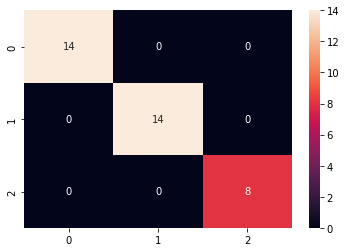

In [50]:
print ("K = 1")
import seaborn as sns
cm_1 = confusion_matrix(y_test, predictions_k1[0])
sns.heatmap(cm_1, annot=True)

K = 5


<AxesSubplot:>

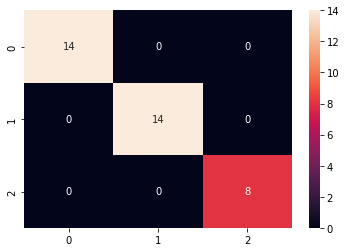

In [51]:
cm_5 = confusion_matrix(y_test, predictions_k5[0])
print ("K = 5")
sns.heatmap(cm_5, annot=True)

K = 10


<AxesSubplot:>

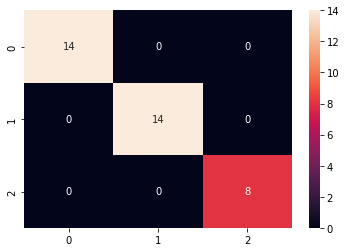

In [204]:
cm_10 = confusion_matrix(y_test, predictions_k10[0])
print ("K = 10")
sns.heatmap(cm_10, annot=True)

K = 20


<AxesSubplot:>

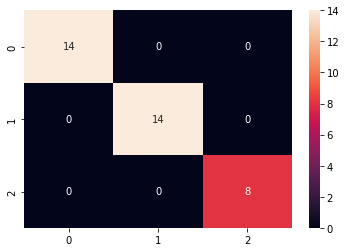

In [205]:
cm_20 = confusion_matrix(y_test, predictions_k20[0])
print ("K = 20")
sns.heatmap(cm_20, annot=True)

## D) Correlation Coefficient

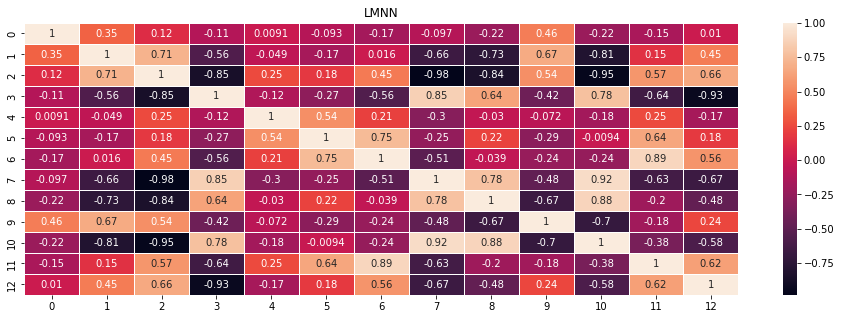

In [67]:
data1 = pd.DataFrame(X_lmnn15main)
correlation1 = data1.corr()
plt.figure(figsize = (16,5))
plt.title('LMNN')
cm = sns.heatmap(correlation, annot=True, linewidths=0.5)


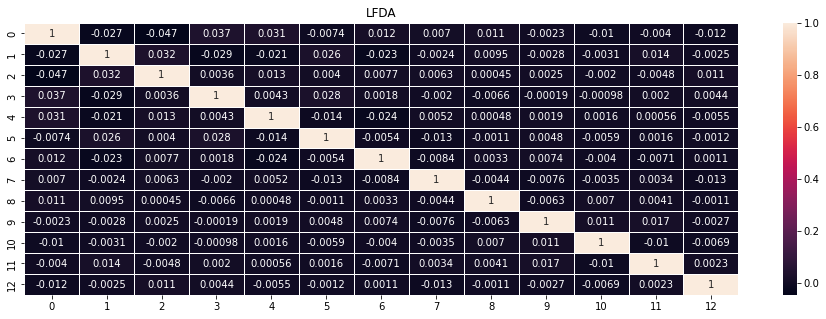

In [71]:
data2 = pd.DataFrame(X_lfda15main)
correlation2 = data2.corr()
plt.figure(figsize = (16,5))
plt.title('LFDA')
cm = sns.heatmap(correlation2, annot=True, linewidths=0.5)

In [65]:
X_lfda15main.shape

(178, 13)